# Precipitation Event Week
## Flood prediction through H SAF rainfall products merged with rain gauges data

### Conditional Merging for Improving Rainfall in scarcerly gauged areas

In this exercise we will run the MISDc rainfall-runoff model over the Tiber River Basin with different rainfall products as input:
* H SAF H05 Rainfall
* Rain gauge data interpolated with GRISO algorithm
* Rain gauge data conditional merging with H SAF H05

We will compare the performance of each product to assess the difference between them in terms of output at the Monte Molino closing section. 

All the data are stored in the text file "TEVERE_DATA_merging.txt" for the 02-01-2018 - 30-11-2019 at the hourly resolution.

Import the necessary python libraries

In [1]:
from MILc_2 import *
from pytesmo import temporal_matching
from pytesmo import metrics
import ascat
from pytesmo import scaling
from pytesmo.time_series.filters import exp_filter
import matplotlib.dates as mdates

Loading ground and satellite data into the workspace for the Tiber River Basin over the 23-03-2019 / 23-11-2019 period (dates can be edited, but due to the resolution longer periods require significantly longer computational time)

In [2]:
name='TEVERE'
start_date = '2019-03-23 00:00'
end_date = '2019-11-23 23:00'

data_input=pd.read_csv(name+'_DATA_merging.txt', index_col=0, header = None, sep=',', names = ['P_GAUGE','P_HSAF',
                                                                                             'P_merging','Q','T'], 
                       na_values='nan', parse_dates=True).loc[start_date:end_date]

PAR=np.loadtxt(name+'_PARAMETERS.txt')
Ab=5270

fig=1

Structure of the input dataset

In [3]:
data_input[0:20]

,P_GAUGE,P_HSAF,P_merging,Q,T
2019-03-23 00:00:00,0.0,0.0,0.0,6.659481,6.6
2019-03-23 01:00:00,0.0,0.0,0.0,6.659481,6.4
2019-03-23 02:00:00,0.0,0.0,0.0,5.807709,6.0
2019-03-23 03:00:00,0.0,0.0,0.0,5.807709,5.8
2019-03-23 04:00:00,0.0,0.0,0.0,6.659481,5.5
2019-03-23 05:00:00,0.0,0.0,0.0,5.807709,5.2
2019-03-23 06:00:00,0.0,0.0,0.0,6.659481,5.8
2019-03-23 07:00:00,0.0,0.0,0.0,7.089644,8.8
2019-03-23 08:00:00,0.0,0.0,0.0,5.386102,12.1
2019-03-23 09:00:00,0.0,0.0,0.0,6.232170,14.8


Comparison of different input products

Pearson_HSAF_vs_GAUGE: 0.14735901674151206
Pearson_Merging_vs_GAUGE: 0.9989797165385891


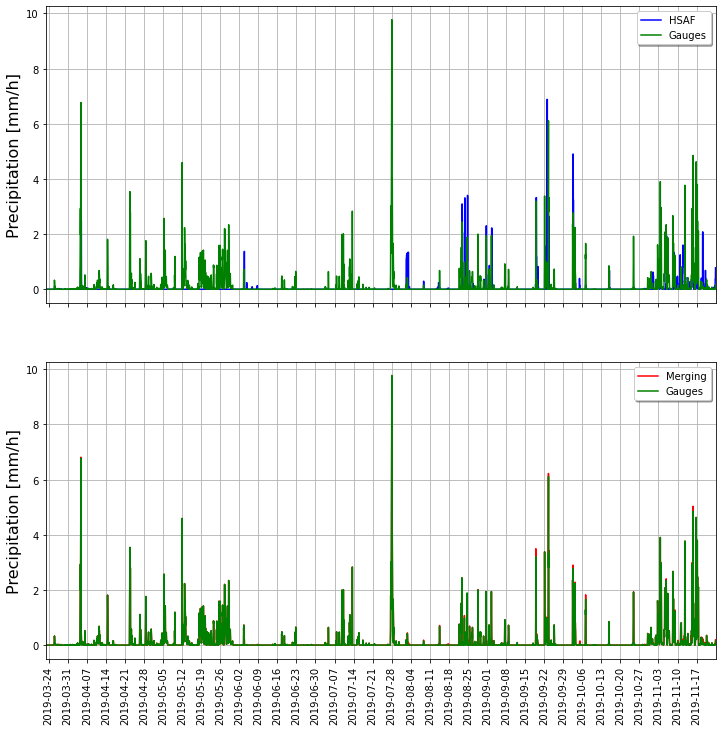

In [4]:
f, ax = plt.subplots(2, sharex=True, figsize=(12, 12))
xlabel_step_nDays=7

ax[0].plot(data_input.index, data_input['P_HSAF'].values,label='HSAF',color='b')
ax[0].plot(data_input.index, data_input['P_GAUGE'].values,label='Gauges',color='g')
ax[1].plot(data_input.index, data_input['P_merging'].values,label='Merging',color='r')
ax[1].plot(data_input.index, data_input['P_GAUGE'].values,label='Gauges',color='g')
ax[0].set_ylabel('Precipitation [mm/h]', fontsize=16) 
ax[1].set_ylabel('Precipitation [mm/h]', fontsize=16) 
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=xlabel_step_nDays))
ax[1].tick_params(axis='x',which='major', labelsize=10, labelrotation=90)
ax[1].set_xlim(np.min(data_input.index),np.max(data_input.index))
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend(loc='upper right', shadow=True)
ax[1].legend(loc='upper right', shadow=True)
R_1=metrics.pearsonr(data_input['P_GAUGE'].values.astype(float),data_input['P_HSAF'].values.astype(float))
R_2=metrics.pearsonr(data_input['P_GAUGE'].values.astype(float),data_input['P_merging'].values.astype(float))
print("Pearson_HSAF_vs_GAUGE: " + str(R_1[0]))
print("Pearson_Merging_vs_GAUGE: " + str(R_2[0]))
f.savefig('mmObs_mmModel', dpi=120)

<div style="text-align: justify">Model run over the entire analysis with as input precipitation HSAF-H05 rainfall data.</div>

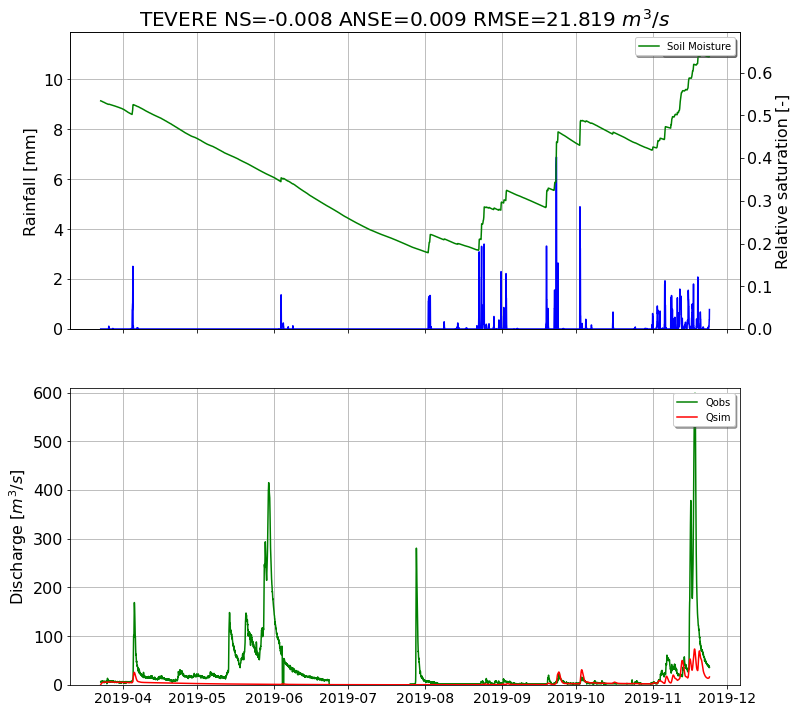

In [5]:
name_run='TEV_HSAF'
data_input1=pd.read_csv(name+'_DATA_merging.txt', index_col=0, header = None, sep=',', names = ['P_GAUGE','P',
                                                                                             'P_merging','Q','T'], 
                       na_values='nan', parse_dates=True).loc[start_date:end_date]
#PAR=np.loadtxt(name+'_PAR_HSAF_merging_2.txt')
QobsQsim,data_HSAF=MILC(name,data_input1,PAR,Ab,1)

Model run over the entire analysis with as input precipitation Rain Gauge interpolated with GRISO rainfall data.

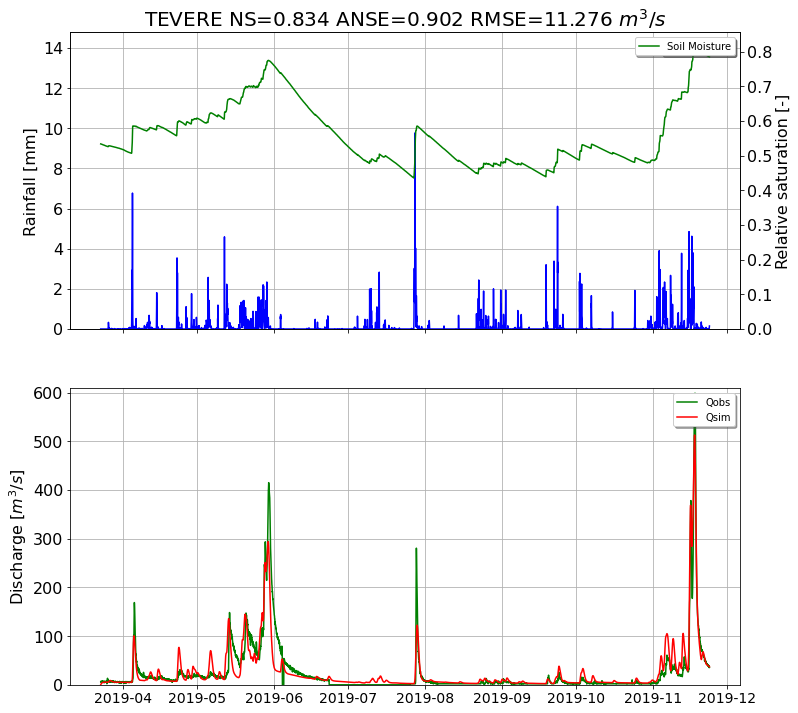

In [6]:
name_run='TEV_GAUGE'
data_input1=pd.read_csv(name+'_DATA_merging.txt', index_col=0, header = None, sep=',', names = ['P','P_HSAF',
                                                                                             'P_merging','Q','T'], 
                       na_values='nan', parse_dates=True).loc[start_date:end_date]
#PAR=np.loadtxt(name+'_PAR_HSAF_merging_2.txt') #'_PAR_GAUGES.txt')
QobsQsim,data_GAUGE=MILC(name,data_input1,PAR,Ab,1)

Model run over the entire analysis with as input precipitation HSAF Conditional merging with rain gauges

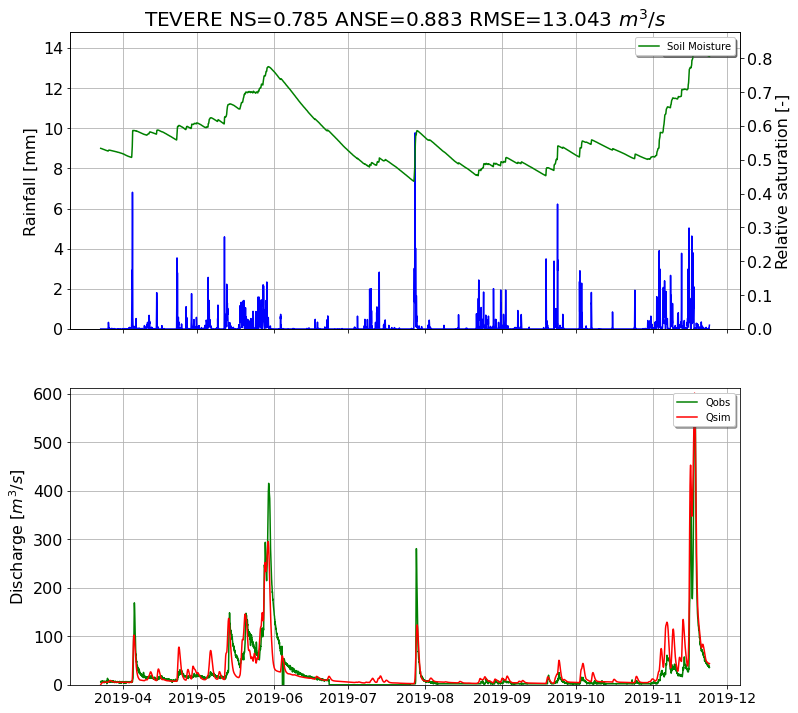

In [7]:
name_run='TEV_merging'
data_input1=pd.read_csv(name+'_DATA_merging.txt', index_col=0, header = None, sep=',', names = ['P_GAUGE','P_HSAF',
                                                                                             'P','Q','T'], 
                       na_values='nan', parse_dates=True).loc[start_date:end_date]
#PAR=np.loadtxt(name+'_PAR_HSAF_merging_2.txt')
QobsQsim,data_merging=MILC(name,data_input1,PAR,Ab,1)

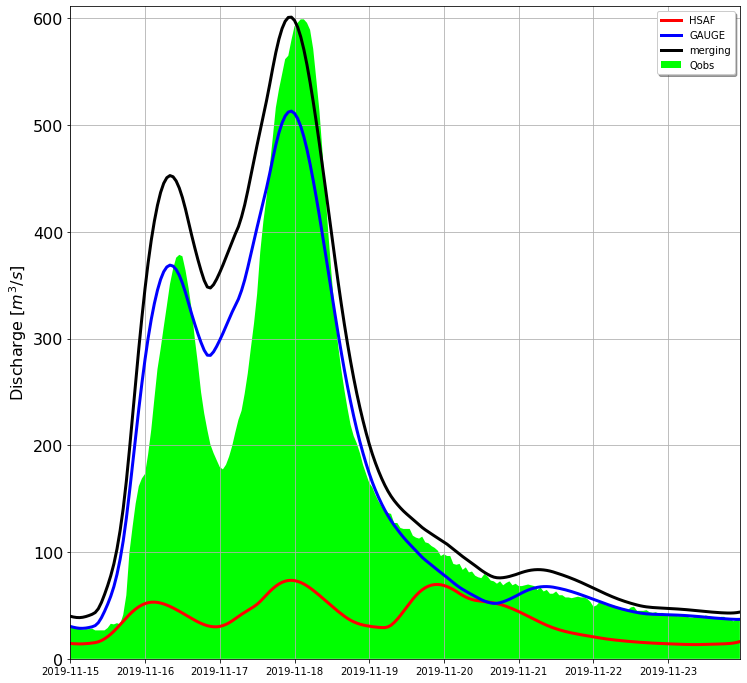

In [8]:
f, ax = plt.subplots(1,figsize=(12, 12))

start_zoom = '2019-11-15 00:00'
end_zoom = '2019-11-23 23:00'

ax.fill_between(data_input.index, data_input['Q'].values,label='Qobs',facecolor=(0, 1, 0))
ax.plot(data_HSAF.index, data_HSAF['S'].values,label='HSAF',color='r',linewidth=3.0)
ax.plot(data_GAUGE.index, data_GAUGE['S'].values,label='GAUGE',color='b',linewidth=3.0)
ax.plot(data_merging.index, data_merging['S'].values,label='merging',color='k',linewidth=3.0)
ax.set_xlim(pd.Timestamp(start_zoom),pd.Timestamp(end_zoom))
ax.set_ylim(0,np.max(np.append(data_input['Q'].values.max(), data_merging['S'].values.max()))+10)
ax.set_ylabel('Discharge [$m^3/s$]', fontsize=16)
ax.grid(True)
ax.tick_params(axis='y', labelsize=16)
ax.legend(loc='upper right', shadow=True)
                
f.savefig('Qsim_zoom', dpi=120)

## Lab done!!!